### sklearn 中多项式回归的使用

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#1.创建数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [7]:
from  sklearn.preprocessing import PolynomialFeatures
#2.使用 为X添加属性，degree超参数，表示为其添加几次幂的特征
poly = PolynomialFeatures(degree=2)
#这一过程有点像数据归一化的过程
poly.fit(X)
X2 = poly.transform(X)

In [9]:
#3.查看生成的数据
X[:5,:]

array([[-1.99453036],
       [-2.25352082],
       [ 2.93517985],
       [ 0.50327175],
       [-2.5784126 ]])

In [11]:
# 在 X2 前面会生成一个 1，代表0次幂
X2[:5,:]

array([[ 1.        , -1.99453036,  3.97815137],
       [ 1.        , -2.25352082,  5.07835607],
       [ 1.        ,  2.93517985,  8.61528073],
       [ 1.        ,  0.50327175,  0.25328246],
       [ 1.        , -2.5784126 ,  6.64821155]])

In [12]:
#3.进行一个线性的拟合
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2,y)
y_predict = lin_reg.predict(X2)

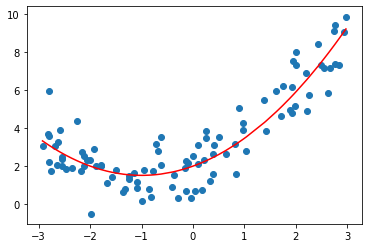

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [17]:
# 查看相应的数据
lin_reg.coef_

array([0.        , 0.97377989, 0.48783222])

In [19]:
lin_reg.intercept_

1.9938925057035404

### 关于 PolynomialFeatures
看当有多个特征的数据集，以及设置不同的 degree 超参数的时候会生成什么样的数据

In [20]:
# 生成一个 2维数据
X = np.arange(1, 11).reshape(-1, 2)

In [26]:
X.shape

(5, 2)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [27]:
X2.shape

(5, 6)

In [24]:
#可以看到生成的数据集有 1，X1，X2,X1X2，X1^2,X2^2
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [28]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [29]:
X3.shape

(5, 10)

In [31]:
#生成的X3的数据为 1，X1,X2,X1^2,X2^2,X1X2,X1^3,X2^3,X1^2X2,X1X2^2

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### 使用 pipeline 实现自己的多项式类
sklearn 并没有提供关于多项式的算法，所以这里将实现多项式的算法封装在一个类中，通过这个管道类实现多项式回归

In [33]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
# 1. 创建 Pipline 这个管道，实现自己的多项式的类,用字典的方式传入要操作的类
poly_reg = Pipeline([
    
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [39]:
# 2.由上一步相应的类都被实现,然后拟合数据
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

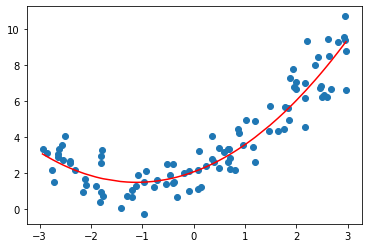

In [40]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')